In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
df = pd.read_csv("../fixation/18sat_fixfinal.csv")
label = pd.read_csv("../fixation/18sat_labels.csv")
df_filtered = df[(df['page_name']== 'reading-dickens-2') & (df['RECORDING_SESSION_LABEL'] == 'msd100')]
df_filtered = df_filtered.sort_values("CURRENT_FIX_INTEREST_AREA_ID")

In [4]:
df_filtered[['RECORDING_SESSION_LABEL', 'CURRENT_FIX_X', 'CURRENT_FIX_Y', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_DURATION']] \
    .merge(label[label['book'] == 'dickens'], left_on='RECORDING_SESSION_LABEL', right_on='subj', how = 'inner' )

,RECORDING_SESSION_LABEL,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_PUPIL,CURRENT_FIX_DURATION,subj,book,acc,confidence,difficulty,...,interest,pressured,sleepiness,sleephours,acc_level,subj_acc,language,sex,native,subj_acc_level
0,msd001,819.9,718.7,1673.0,213,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
1,msd001,867.4,708.7,1519.0,165,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
2,msd001,167.3,124.8,1348.0,194,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
3,msd001,225.6,114.6,1358.0,117,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
4,msd001,270.9,111.3,1382.0,210,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,msd001,697.0,645.5,1785.0,183,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
108,msd001,798.9,640.4,1606.0,255,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
109,msd001,864.5,639.3,1567.0,143,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3
110,msd001,59.8,125.4,1430.0,22,msd001,dickens,0.6,2,0,...,2,0,1,2,2,0.75,English,F,1,3


In [12]:
read = df[(df.type == 'reading')].loc[:, ['RECORDING_SESSION_LABEL','page', 'page_name']]

In [16]:
read[read.page_name.str.startswith("reading-northpole")].page_name.value_counts()

reading-northpole-1    16616
reading-northpole-2    13411
reading-northpole-4    13244
reading-northpole-3    12839
reading-northpole-5     5370
Name: page_name, dtype: int64

In [17]:
read[read.page_name.str.startswith("reading-flytrap")].page_name.value_counts()

reading-flytrap-1    15072
reading-flytrap-2    13510
reading-flytrap-3    12368
reading-flytrap-4    11193
reading-flytrap-6    10967
reading-flytrap-5    10556
Name: page_name, dtype: int64

In [18]:
read[read.page_name.str.startswith("reading-dickens")].page_name.value_counts()

reading-dickens-1    14430
reading-dickens-3    13154
reading-dickens-2    11624
reading-dickens-4    10086
reading-dickens-5     9607
Name: page_name, dtype: int64

In [19]:
read[read.page_name.str.startswith("reading-genome")].page_name.value_counts()

reading-genome-2    13866
reading-genome-3    13318
reading-genome-4    13280
reading-genome-1    12753
reading-genome-5    12514
reading-genome-6     3254
Name: page_name, dtype: int64

> Every passage has atleast 5 pages hence we can choose any random one page as a test label and all other for training

## Feature Addition

In [3]:
def adding_word_length(x):
    if pd.isna(x['CURRENT_FIX_INTEREST_AREA_LABEL']):
        return 0
    else:
        return len(x.CURRENT_FIX_INTEREST_AREA_LABEL)
# import functions
# from functions.word_length import adding_word_length


In [4]:
df['word_length'] = df.apply(adding_word_length, axis = 1)

In [5]:
word_occ = df[['RECORDING_SESSION_LABEL','page_name' ,'CURRENT_FIX_INTEREST_AREA_ID','CURRENT_FIX_INTEREST_AREA_LABEL', 'word_length']].groupby(['RECORDING_SESSION_LABEL','page_name', 'CURRENT_FIX_INTEREST_AREA_ID' ,'CURRENT_FIX_INTEREST_AREA_LABEL'], as_index= False).count()
word_occ.rename(columns = {"word_length":"word_occurance_count"}, inplace=True)

In [6]:
df = df.merge(word_occ, on= ['RECORDING_SESSION_LABEL','page_name' ,'CURRENT_FIX_INTEREST_AREA_ID','CURRENT_FIX_INTEREST_AREA_LABEL'])

In [7]:
df_cognitive = df[['RECORDING_SESSION_LABEL', 'CURRENT_FIX_X', \
    'CURRENT_FIX_Y', 'CURRENT_FIX_PUPIL', \
        'CURRENT_FIX_DURATION', 'RT', \
            'word_length', 'word_occurance_count', 'book_name', 'page_name', \
                'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_INTEREST_AREA_ID']] \
    .merge(label, left_on=['RECORDING_SESSION_LABEL', 'book_name'], right_on=['subj', 'book'], how = 'inner' )

In [8]:
df_cognitive.columns

Index(['RECORDING_SESSION_LABEL', 'CURRENT_FIX_X', 'CURRENT_FIX_Y',
       'CURRENT_FIX_PUPIL', 'CURRENT_FIX_DURATION', 'RT', 'word_length',
       'word_occurance_count', 'book_name', 'page_name',
       'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_INTEREST_AREA_ID',
       'subj', 'book', 'acc', 'confidence', 'difficulty', 'familiarity',
       'recognition', 'interest', 'pressured', 'sleepiness', 'sleephours',
       'acc_level', 'subj_acc', 'language', 'sex', 'native', 'subj_acc_level'],
      dtype='object')

In [39]:
subj = df_cognitive.subj.unique()
test_subj = np.random.choice(subj, 5, replace= False)

df_test = df_cognitive[df_cognitive.subj.isin(test_subj)]
df_train = df_cognitive[~df_cognitive.subj.isin(test_subj)]

In [40]:
def prep_data(df):

    subj = df.subj.unique()
    page_book = df.page_name.unique()
    matrix = []
    target = []
    subjects = []

    seq_len = 0

    for s in tqdm(subj):
        for pb in page_book:
            temp = df[(df.subj == s) & (df.page_name == pb)]
            if temp.shape[0] == 0:
                continue
            temp = temp.sort_values("CURRENT_FIX_INTEREST_AREA_ID")
            target.append(temp['acc'].iloc[0])
            temp = temp.drop(['RECORDING_SESSION_LABEL', 'book_name', 'page_name', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_INTEREST_AREA_ID', \
                'subj', 'book', 'acc', 'language', 'sex'], axis = 1)
            if temp.shape[0] > seq_len:
                seq_len = temp.shape[0]
            matrix.append(temp.to_numpy())
            subjects.append(s)
    return matrix, target, subjects

In [41]:
train_matrix, train_target, train_subj = prep_data(df_train)

100%|██████████| 90/90 [00:38<00:00,  2.34it/s]


In [26]:
# subj = df_cognitive.subj.unique()
# page_book = df_cognitive.page_name.unique()
# matrix = []
# target = []
# subjects = []

# seq_len = 0

# for s in tqdm(subj):
#     for pb in page_book:
#         temp = df_cognitive[(df_cognitive.subj == s) & (df_cognitive.page_name == pb)]
#         if temp.shape[0] == 0:
#             continue
#         temp = temp.sort_values("CURRENT_FIX_INTEREST_AREA_ID")
#         target.append(temp['acc'].iloc[0])
#         temp = temp.drop(['RECORDING_SESSION_LABEL', 'book_name', 'page_name', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_INTEREST_AREA_ID', \
#             'subj', 'book', 'acc', 'language', 'sex'], axis = 1)
#         if temp.shape[0] > seq_len:
#             seq_len = temp.shape[0]
#         matrix.append(temp.to_numpy())
#         subjects.append(s)

100%|██████████| 95/95 [00:42<00:00,  2.23it/s]


In [38]:
len(subjects)

2054

In [33]:
subj = df_cognitive.subj.unique()
test_subj = np.random.choice(subj, 5, replace= False)

num_test = np.sum(np.isin(subjects, test_subj))

train_arr  = np.zeros((len(subjects) - num_test, seq_len, matrix[0].shape[1]))

test_arr = np.zeros((num_test, seq_len, matrix[0].shape[1]))

for sub, arr in zip(subjects, matrix):
    if sub in test_subj:
        test_arr 

110


/tmp/ipykernel_3892/3740010592.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(matrix)


array([array([[8.803e+02, 3.430e+01, 1.333e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              [8.393e+02, 5.220e+01, 1.231e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              [8.837e+02, 3.710e+01, 1.286e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              ...,
              [7.987e+02, 6.152e+02, 1.050e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              [8.835e+02, 6.105e+02, 1.016e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              [8.972e+02, 6.045e+02, 9.910e+02, ..., 7.500e-01, 1.000e+00,
               3.000e+00]])                                               ,
       array([[8.874e+02, 7.136e+02, 9.950e+02, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              [6.120e+01, 1.223e+02, 1.186e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              [6.090e+01, 1.006e+02, 1.310e+03, ..., 7.500e-01, 1.000e+00,
               3.000e+00],
              

In [30]:
# df_cognitive[(df_cognitive.subj == 'msd004') & (df_cognitive.page_name == 'reading-northpole-4')]

In [13]:
subj = df_cognitive.subj.unique()
test_subj = np.random.choice(subj, 5, replace= False)

df_test = df_cognitive[df_cognitive.subj.isin(test_subj)]
df_train = df_cognitive[~df_cognitive.subj.isin(test_subj)]

In [15]:
df_test = df_test.drop(['RECORDING_SESSION_LABEL', 'book_name', 'book', 'language', 'subj'], axis = 1)
df_train = df_train.drop(['RECORDING_SESSION_LABEL', 'book_name', 'book', 'language', 'subj'], axis = 1)

In [17]:
df_train

((12071, 21), (239016, 21))

#### EDA

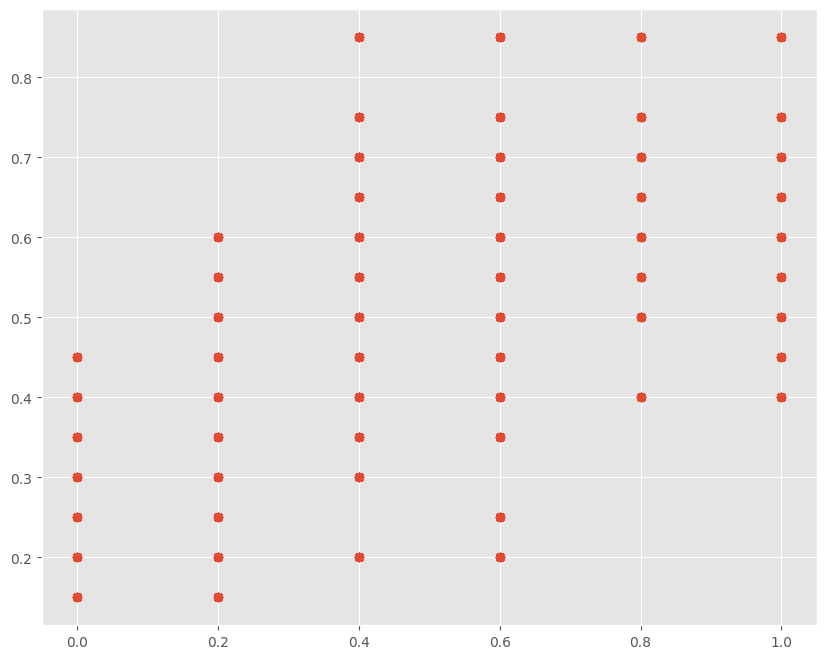

In [35]:
plt.figure(figsize= (10,8))
plt.style.use('ggplot')

plt.scatter(df_cognitive.acc, df_cognitive.subj_acc)


In [43]:
df_cognitive.acc.value_counts()

0.6    83869
0.4    67984
0.8    44493
0.2    27246
1.0    21815
0.0     5680
Name: acc, dtype: int64

In [46]:
cnt = df_cognitive.acc.value_counts().to_frame(name='counts').reset_index()
cnt.rename(columns= {"index": "acc"}, inplace= True)
cnt.head()

,acc,counts
0,0.6,83869
1,0.4,67984
2,0.8,44493
3,0.2,27246
4,1.0,21815


Text(0, 0.5, 'general accuracy')

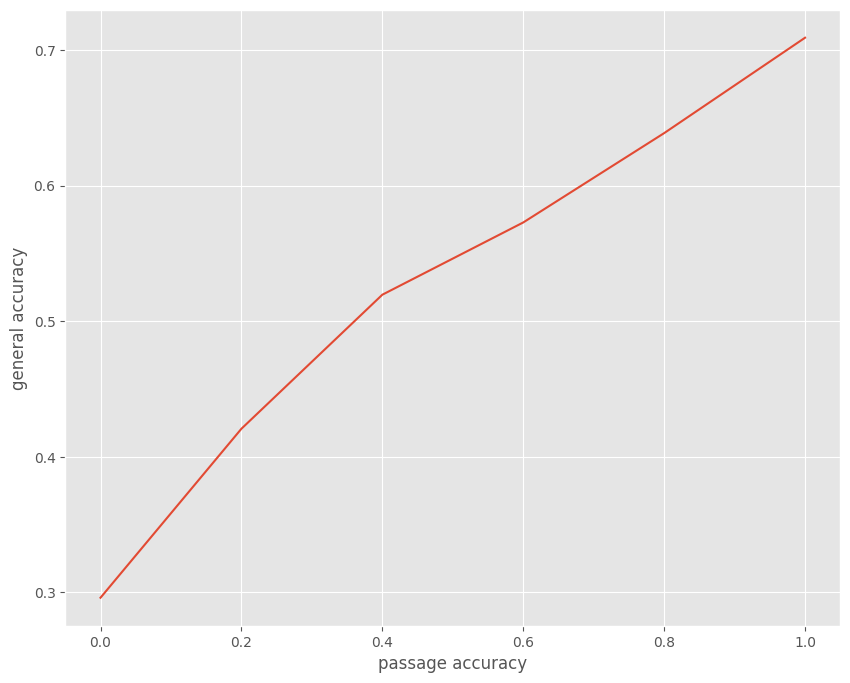

In [49]:
a = df_cognitive[['acc', 'subj_acc']].groupby('acc', as_index= False).mean()
plt.figure(figsize= (10,8))
plt.style.use('ggplot')

plt.plot(a.acc, a.subj_acc)
plt.xlabel("passage accuracy")
plt.ylabel("general accuracy")

In [ ]:
from transformers import BertTokenizer, TFBertForMaskedLM
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertForMaskedLM.from_pretrained("bert-base-uncased")

inputs = tokenizer("The capital of France is [MASK].", return_tensors="tf")
logits = model(**inputs).logits

# retrieve index of [MASK]
mask_token_index = tf.where((inputs.input_ids == tokenizer.mask_token_id)[0])
selected_logits = tf.gather_nd(logits[0], indices=mask_token_index)

predicted_token_id = tf.math.argmax(selected_logits, axis=-1)
tokenizer.decode(predicted_token_id)

## Passage Split

In [46]:
test_page = ['dickens', 'genome', 'flytrap', 'northpole']
test_page = random.choice(test_page)
print("The passage selected as a test label is "+ test_page)

The passage selected as a test label is dickens


In [47]:
test = df[(df.page_name.str.contains(test_page)) & (df.type == 'reading')]
train = df[~(df.page_name.str.contains(test_page)) & (df.type == 'reading')]
train = train.sort_values(['page_name', 'CURRENT_FIX_INTEREST_AREA_ID'],
              ascending = [True, True])
test = test.sort_values(['page_name', 'CURRENT_FIX_INTEREST_AREA_ID'],
              ascending = [True, True])

In [48]:
train_indivitual = train[train.RECORDING_SESSION_LABEL == 'msd001']
test_indivitual = test[test.RECORDING_SESSION_LABEL == 'msd001']

In [49]:
train_indivitual.head(1)

,RECORDING_SESSION_LABEL,TRIAL_INDEX,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_PUPIL,CURRENT_FIX_DURATION,CURRENT_FIX_INTEREST_AREA_ID,CURRENT_FIX_INTEREST_AREA_LABEL,CURRENT_FIX_INTEREST_AREA_PIXEL_AREA,CURRENT_FIX_INTEREST_AREA_RUN_ID,...,Trial_Recycled_,total_page,type,book_name,book,page,RT,answer,correct_answer,page_name
1088,msd001,19,212.4,92.1,1579.0,242,5.0,Venus,5624.0,1.0,...,True,6,reading,flytrap,2,1,29015.198413,1,-99,reading-flytrap-1


In [50]:
train_indivitual = train_indivitual[['RECORDING_SESSION_LABEL', 'CURRENT_FIX_X', 'CURRENT_FIX_Y', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_DURATION', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'RT', 'book_name']] \
    .merge(label, left_on=['RECORDING_SESSION_LABEL', 'book_name'], right_on=['subj', 'book'], how = 'inner' )
    
    
test_indivitual = test_indivitual[['RECORDING_SESSION_LABEL', 'CURRENT_FIX_X', 'CURRENT_FIX_Y', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_DURATION', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'RT', 'book_name']] \
    .merge(label, left_on=['RECORDING_SESSION_LABEL', 'book_name'], right_on=['subj', 'book'], how = 'inner' )

In [52]:
train_indivitual.head(20)

,RECORDING_SESSION_LABEL,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_PUPIL,CURRENT_FIX_DURATION,CURRENT_FIX_INTEREST_AREA_LABEL,RT,book_name,subj,book,...,interest,pressured,sleepiness,sleephours,acc_level,subj_acc,language,sex,native,subj_acc_level
0,msd001,212.4,92.1,1579.0,242,Venus,29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
1,msd001,393.1,82.6,1552.0,243,[Dionaea,29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
2,msd001,398.6,99.1,1575.0,325,[Dionaea,29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
3,msd001,398.2,153.5,1651.0,130,[Dionaea,29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
4,msd001,424.1,151.3,1794.0,297,[Dionaea,29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
5,msd001,402.4,140.2,1434.0,262,[Dionaea,29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
6,msd001,432.9,109.8,1514.0,94,muscipula],29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
7,msd001,509.6,97.9,1624.0,157,muscipula],29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
8,msd001,453.3,98.2,1519.0,176,muscipula],29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3
9,msd001,482.1,102.6,1558.0,209,muscipula],29015.198413,flytrap,msd001,flytrap,...,2,1,1,2,3,0.75,English,F,1,3


In [51]:
test_indivitual.head(2)

,RECORDING_SESSION_LABEL,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_PUPIL,CURRENT_FIX_DURATION,CURRENT_FIX_INTEREST_AREA_LABEL,RT,book_name,subj,book,...,interest,pressured,sleepiness,sleephours,acc_level,subj_acc,language,sex,native,subj_acc_level
0,msd001,867.4,708.7,1519.0,165,next_PAGE,25094.538413,dickens,msd001,dickens,...,2,0,1,2,2,0.75,English,F,1,3
1,msd001,819.9,718.7,1673.0,213,next_PAGE,25094.538413,dickens,msd001,dickens,...,2,0,1,2,2,0.75,English,F,1,3


In [55]:
df_filtered.loc[15:35, ['CURRENT_FIX_INTEREST_AREA_LABEL']]

,CURRENT_FIX_INTEREST_AREA_LABEL
15,paper
16,ink.
17,school
18,had
19,learned
20,read
21,long
1,long
22,before
6,other
